In [2]:
import numpy as np
import glob
import pandas as pd
from pandas import Series,DataFrame
from sklearn.cluster import MiniBatchKMeans

import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

sample_dir='/Users/gus/CDIPS/nerve-project/samples/'

sample_images = glob.glob(sample_dir+'*')


def load_data():
    data= pd.read_msgpack('patch_data')
    return data

In [3]:
import sampling as smp
from sampling import build_data

In [4]:
time data=build_data(50,50,17)

sampling.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return image[hor_range[0]:hor_range[1],ver_range[0]:ver_range[1]]


CPU times: user 5.23 s, sys: 518 ms, total: 5.75 s
Wall time: 6.63 s


In [5]:
skeys = sorted(data.keys())

In [78]:
len(skeys)

4766

In [7]:
def grab_ultra_patches(F):
    im_patches=[]
    for idx, key in enumerate(skeys):
        if idx%500 ==0:
            print 'Reading patch ', idx
        ultra_image = smp.image_pair(key[0],key[1]).image
        im_patches.append(smp.get_patch(ultra_image,key[2],F).flatten())
    return np.array(im_patches)

In [9]:
time ultra_patches = grab_ultra_patches(17)

Reading patch  0
Reading patch  100
Reading patch  200
Reading patch  300
Reading patch  400
Reading patch  500
Reading patch  600
Reading patch  700
Reading patch  800
Reading patch  900
Reading patch  1000
Reading patch  1100
Reading patch  1200
Reading patch  1300
Reading patch  1400
Reading patch  1500
Reading patch  1600
Reading patch  1700
Reading patch  1800
Reading patch  1900
Reading patch  2000
Reading patch  2100
Reading patch  2200
Reading patch  2300
Reading patch  2400
Reading patch  2500
Reading patch  2600
Reading patch  2700
Reading patch  2800
Reading patch  2900
Reading patch  3000
Reading patch  3100
Reading patch  3200
Reading patch  3300
Reading patch  3400
Reading patch  3500
Reading patch  3600
Reading patch  3700
Reading patch  3800
Reading patch  3900
Reading patch  4000
Reading patch  4100
Reading patch  4200
Reading patch  4300
Reading patch  4400
Reading patch  4500
Reading patch  4600
Reading patch  4700
CPU times: user 4min 14s, sys: 20.5 s, total: 4min 3

In [16]:
dataList = [data[k].flatten() for k in skeys ]
dataArray = np.array(dataList)

In [17]:
dataList[0].shape

(1225,)

In [83]:
kmeans= MiniBatchKMeans(50).fit(dataArray)
predictions=MiniBatchKMeans(50).fit_predict(dataArray)

//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 4765 + 1) instead
  0, n_samples - 1, init_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4765 + 1) instead
  0, n_samples - 1, init_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4765 + 1) instead
  0, n_samples - 1, init_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4765 + 1) instead
  0, n_samples - 1, init_size)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randint(0, 4765 + 1) instead
  0, n_samples - 1, self.batch_size)
//anaconda/lib/python2.7/si

In [84]:
clusters=[arr .reshape(35,35) for arr in kmeans.cluster_centers_ ]

In [85]:
predictions.shape

(4766,)

In [86]:
pred =  DataFrame(predictions,columns=['cluster'])

In [87]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 1 columns):
cluster    4766 non-null int32
dtypes: int32(1)
memory usage: 18.7 KB


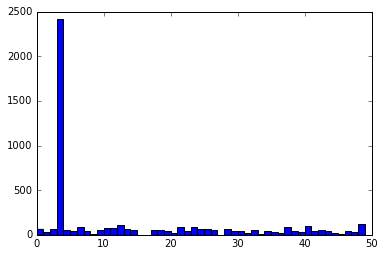

In [89]:
cluster_sizes=plt.hist(pred.cluster,bins=range(50)[::1])

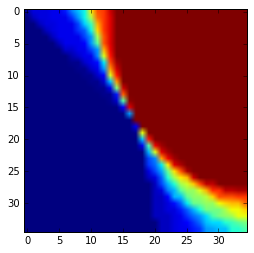

In [94]:
plt.imshow(clusters[20])

In [81]:
ultra_patches.shape

(4766, 1225)

In [114]:
K=50

In [115]:
K

50

In [109]:
def to_one_hot(n,K):
    res= np.zeros(K)
    res[n]=1
    return res

In [118]:
y = np.array([to_one_hot(p,K) for p in predictions])

In [121]:
y[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [52]:
###### for training a CNN: take ultra_patches as the training data
###### and take y as the ground truth for output data

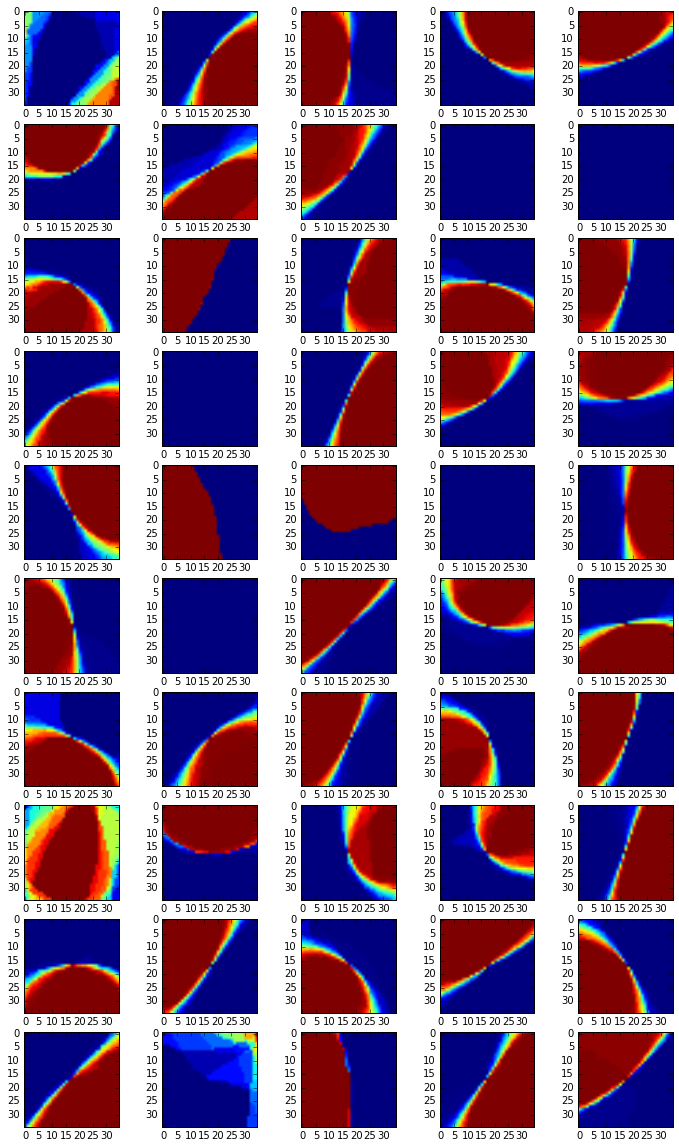

In [127]:
fig,ax = plt.subplots(10,5,figsize=(12,20))
ax= ax.flatten()
scale=4
for idx in range(50):
    ax[idx].imshow(clusters[idx])
plt.show()